##### Problems<br><br>-Download price data for NIFTY50 symbols<br>-Calculate annualized absolute daily returns, CAGR, beta, annualized mean volume and annualized standard deviation of volume<br>-Rank symbols in terms of each

In [24]:
import pandas as pd 
import numpy as np
from datetime import datetime, timedelta 
import yfinance as yf
from pandas.testing import assert_frame_equal
import matplotlib.pyplot as plt 
%matplotlib inline 

##### Initialize variables to use

In [2]:
start_date = '2020-01-01'
end_date   = '2021-11-30'
use_file   = True 

##### Read in NIFTY symbol file 

In [126]:
t = round((pd.Timestamp(end_date) - pd.Timestamp(start_date)).days/365, 4)
syms = pd.read_excel('datasets/nifty.xlsx')
syms.columns = ['company', 'sector', 'yfinance-symbol']

In [149]:
syms['sector'].value_counts()

Consumer Goods            6
Banking                   6
Automobile                6
Financial Services        5
Information Technology    5
Energy - Oil & Gas        4
Pharmaceuticals           4
Metals                    4
Cement                    3
Energy - Power            2
Infrastructure            1
Telecommunication         1
Construction              1
Consumer Durables         1
Chemicals                 1
Name: sector, dtype: int64

##### Generate symbol list

In [127]:
sym_names = syms['yfinance-symbol'].tolist()
index_sym = '^NSEI'

##### Download or read NIFTY price data 

In [ ]:
if use_file == False:
    data_df = yf.download(sym_names, start_date, end_date)
    data_df.to_csv('nifty_price_data.csv')
    index_df = yf.download(index_sym, start_date, end_date)
    index_df.to_csv('nifty_index_price_data.csv')
else:
    data_df = pd.read_csv('nifty_price_data.csv', header=[0,1])
    index_df = pd.read_csv('nifty_index_price_data.csv')

##### Generate adjusted close and volume dataframes

In [128]:
sym_adjcl_df = data_df['Adj Close']
sym_vol_df   = data_df['Volume']
sym_rets_df  = sym_adjcl_df.pct_change().dropna(axis=0)
idx_adjcl_df = index_df['Adj Close'].to_frame().rename(columns={'Adj Close':'NSEI'})
idx_vol_df   = index_df['Volume'].to_frame().rename(columns={'Adj Close':'NSEI'})
idx_rets_df  = idx_adjcl_df.pct_change().dropna(axis=0) 

##### Calculate return, CAGR and beta for the stocks

In [129]:
final_df = pd.DataFrame(columns=['symbol', 'rets', 'cagr', 'beta', 'mean_vol', 'std_vol'])
for idx, sym in enumerate(sym_names):
    init_price, final_price = sym_adjcl_df.iloc[0, idx], sym_adjcl_df.iloc[-1, idx]
    rets = round(sym_rets_df[sym].mean() * 252, 6) 
    cagr = round(((final_price/init_price)**t - 1), 6)
    beta = round(sym_rets_df[sym].cov(idx_rets_df['NSEI']) / idx_rets_df['NSEI'].var(), 6) 
    mean_vol = round(sym_vol_df[sym].mean() * 252, 6)
    std_vol  = round(sym_vol_df[sym].std() * (252**0.5), 6)
    final_df.loc[idx] = [sym, rets, cagr, beta, mean_vol, std_vol ]

##### Reformatting of final dataframe 

In [130]:
syms = pd.merge(syms, final_df, left_on='yfinance-symbol', right_on='symbol')
syms.drop(['yfinance-symbol'], axis=1, inplace=True)

##### Check if rankings of stocks as per rets and CAGR are same or different 

In [133]:
syms.sort_values(['rets'], ascending=False).head(10)

,company,sector,symbol,rets,cagr,beta,mean_vol,std_vol
42,Tata Motors,Automobile,TATAMOTORS.NS,0.648152,4.790032,1.379760,1.580106e+10,7.124260e+08
43,Tata Steel,Metals,TATASTEEL.NS,0.593194,4.780922,1.163029,4.126298e+09,1.382072e+08
11,Divi's Laboratories,Pharmaceuticals,DIVISLAB.NS,0.587133,5.877943,0.570018,2.228374e+08,1.218063e+07
27,JSW Steel,Metals,JSWSTEEL.NS,0.574517,4.474085,1.273666,2.382195e+09,1.037092e+08
49,Wipro,Information Technology,WIPRO.NS,0.559771,5.059264,0.712645,2.794337e+09,2.036948e+08
41,Tata Consumer Products,Consumer Goods,TATACONSUM.NS,0.530641,4.332508,0.897452,1.037938e+09,7.173598e+07
24,Infosys,Information Technology,INFY.NS,0.519143,4.369393,0.846436,2.253235e+09,9.980829e+07
14,Grasim Industries,Cement,GRASIM.NS,0.516971,3.878003,1.091427,5.331106e+08,2.356622e+07
20,Hindalco Industries,Metals,HINDALCO.NS,0.495667,2.714712,1.442499,3.866562e+09,1.341658e+08
45,Tech Mahindra,Information Technology,TECHM.NS,0.481152,3.438199,0.858442,1.051201e+09,4.095360e+07


In [134]:
syms.sort_values(['cagr'], ascending=False).head(10)

,company,sector,symbol,rets,cagr,beta,mean_vol,std_vol
11,Divi's Laboratories,Pharmaceuticals,DIVISLAB.NS,0.587133,5.877943,0.570018,2.228374e+08,1.218063e+07
49,Wipro,Information Technology,WIPRO.NS,0.559771,5.059264,0.712645,2.794337e+09,2.036948e+08
42,Tata Motors,Automobile,TATAMOTORS.NS,0.648152,4.790032,1.379760,1.580106e+10,7.124260e+08
43,Tata Steel,Metals,TATASTEEL.NS,0.593194,4.780922,1.163029,4.126298e+09,1.382072e+08
27,JSW Steel,Metals,JSWSTEEL.NS,0.574517,4.474085,1.273666,2.382195e+09,1.037092e+08
24,Infosys,Information Technology,INFY.NS,0.519143,4.369393,0.846436,2.253235e+09,9.980829e+07
41,Tata Consumer Products,Consumer Goods,TATACONSUM.NS,0.530641,4.332508,0.897452,1.037938e+09,7.173598e+07
14,Grasim Industries,Cement,GRASIM.NS,0.516971,3.878003,1.091427,5.331106e+08,2.356622e+07
45,Tech Mahindra,Information Technology,TECHM.NS,0.481152,3.438199,0.858442,1.051201e+09,4.095360e+07
15,HCL Technologies,Information Technology,HCLTECH.NS,0.443660,3.020647,0.780468,1.564926e+09,6.555629e+07


In [147]:
assert_frame_equal(syms.sort_values(['rets'], ascending=False)[['company', 'rets', 'cagr']], syms.sort_values(['cagr'], ascending=False)[['company', 'rets', 'cagr']])

AssertionError: DataFrame.index are different

DataFrame.index values are different (78.0 %)
[left]:  Int64Index([42, 43, 11, 27, 49, 41, 24, 14, 20, 45, 15, 46,  9,  0,  4,  5, 47,
            40,  1, 30, 36,  6, 12, 44, 35, 38, 22, 34, 29, 48, 32, 39, 28, 33,
            21, 16,  8, 17, 37, 25, 13, 18,  3, 19, 26, 31,  2,  7, 10, 23],
           dtype='int64')
[right]: Int64Index([11, 49, 42, 43, 27, 24, 41, 14, 45, 15,  9, 46, 20,  0, 47,  4,  1,
            40, 44, 12, 36,  5,  6, 30, 35, 29, 38, 22, 32, 34, 39, 21,  8, 33,
            28, 48, 17, 37, 25, 16,  3, 13, 18, 19, 26, 31,  7, 10,  2, 23],
           dtype='int64')

In [148]:
syms.sort_values(['beta'], ascending=False).head(10)

,company,sector,symbol,rets,cagr,beta,mean_vol,std_vol,rets_qcut,cagr_qcut,beta_qcut
23,IndusInd Bank,Banking,INDUSINDBK.NS,-0.026743,-0.616501,1.640898,3.544856e+09,2.083070e+08,"(-0.027700000000000002, 0.12]","(-0.618, 0.227]","(1.266, 1.641]"
2,Axis Bank,Banking,AXISBANK.NS,0.055902,-0.234704,1.531043,5.160564e+09,2.387720e+08,"(-0.027700000000000002, 0.12]","(-0.618, 0.227]","(1.266, 1.641]"
5,Bajaj Finserv,Financial Services,BAJFINANCE.NS,0.393235,1.574335,1.453214,1.121242e+09,6.892095e+07,"(0.371, 0.493]","(1.126, 1.991]","(1.266, 1.641]"
20,Hindalco Industries,Metals,HINDALCO.NS,0.495667,2.714712,1.442499,3.866562e+09,1.341658e+08,"(0.493, 0.648]","(1.991, 3.369]","(1.266, 1.641]"
22,ICICI Bank,Banking,ICICIBANK.NS,0.256390,0.757407,1.441270,6.848141e+09,2.807685e+08,"(0.163, 0.275]","(0.45, 1.126]","(1.266, 1.641]"
42,Tata Motors,Automobile,TATAMOTORS.NS,0.648152,4.790032,1.379760,1.580106e+10,7.124260e+08,"(0.493, 0.648]","(3.369, 5.878]","(1.266, 1.641]"
4,Bajaj Finance,Financial Services,BAJAJFINSV.NS,0.424414,2.090248,1.343029,1.622156e+08,8.723342e+06,"(0.371, 0.493]","(1.991, 3.369]","(1.266, 1.641]"
27,JSW Steel,Metals,JSWSTEEL.NS,0.574517,4.474085,1.273666,2.382195e+09,1.037092e+08,"(0.493, 0.648]","(3.369, 5.878]","(1.266, 1.641]"
16,HDFC,Financial Services,HDFC.NS,0.154470,0.307487,1.272721,1.122225e+09,3.955398e+07,"(0.12, 0.163]","(0.227, 0.45]","(1.266, 1.641]"
38,State Bank of India,Banking,SBIN.NS,0.269689,0.913881,1.229506,1.251016e+10,4.767985e+08,"(0.163, 0.275]","(0.45, 1.126]","(1.049, 1.266]"


##### Generate scatter plots for beta vs. abs returns and beta vs. CAGR

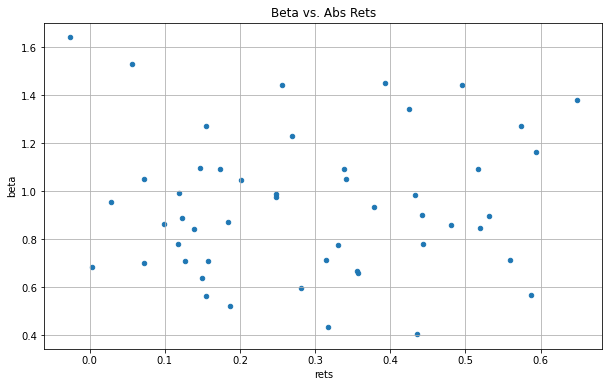

In [136]:
syms.plot(kind='scatter', x='rets', y='beta', figsize=(10, 6), grid=True, title='Beta vs. Abs Rets')
plt.show()

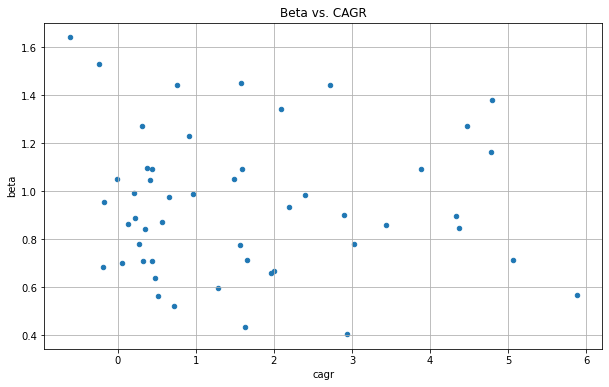

In [137]:
syms.plot(kind='scatter', x='cagr', y='beta', figsize=(10, 6), grid=True, title='Beta vs. CAGR')
plt.show() 

##### Find correlation between returns/cagr with beta 

In [138]:
syms['rets'].corr(syms['beta'])

0.030973056301464196

In [139]:
syms['cagr'].corr(syms['beta'])

-0.053569559030180305

In [150]:
syms['mean_vol'].corr(syms['beta'])

0.3356134004350413

In [151]:
syms['std_vol'].corr(syms['beta'])

0.28219602024244295

##### Divide returns, CAGR and beta in 6 quantiles and check for sector counts 

In [140]:
syms['rets_qcut'] = pd.qcut(syms['rets'], q=6)
syms['cagr_qcut'] = pd.qcut(syms['cagr'], q=6)
syms['beta_qcut'] = pd.qcut(syms['beta'], q=6)

In [141]:
syms.groupby(['rets_qcut'])['sector'].count()

rets_qcut
(-0.027700000000000002, 0.12]    9
(0.12, 0.163]                    8
(0.163, 0.275]                   8
(0.275, 0.371]                   8
(0.371, 0.493]                   8
(0.493, 0.648]                   9
Name: sector, dtype: int64

In [142]:
syms.groupby(['cagr_qcut'])['sector'].count()

cagr_qcut
(-0.618, 0.227]    9
(0.227, 0.45]      8
(0.45, 1.126]      8
(1.126, 1.991]     8
(1.991, 3.369]     8
(3.369, 5.878]     9
Name: sector, dtype: int64

In [143]:
syms.groupby(['beta_qcut'])['sector'].count()

beta_qcut
(0.405, 0.671]    9
(0.671, 0.78]     8
(0.78, 0.9]       8
(0.9, 1.049]      8
(1.049, 1.266]    8
(1.266, 1.641]    9
Name: sector, dtype: int64

In [144]:
syms.groupby(['sector']).agg(unique_beta_qcut=('beta_qcut', 'nunique'), sector_count=('sector', 'count'))

,unique_beta_qcut,sector_count
sector,,
Automobile,4,6
Banking,2,6
Cement,3,3
Chemicals,1,1
Construction,1,1
Consumer Durables,1,1
Consumer Goods,3,6
Energy - Oil & Gas,3,4
Energy - Power,2,2


##### Generate scatter plot beta vs. mean_vol and beta vs. std_vol 

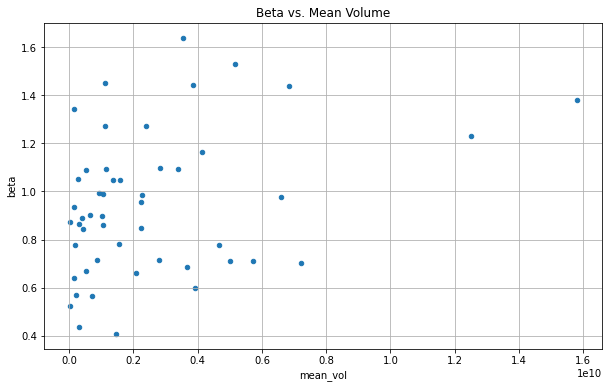

In [145]:
syms.plot(kind='scatter', x='mean_vol', y='beta', grid=True, title='Beta vs. Mean Volume', figsize=(10, 6))
plt.show() 

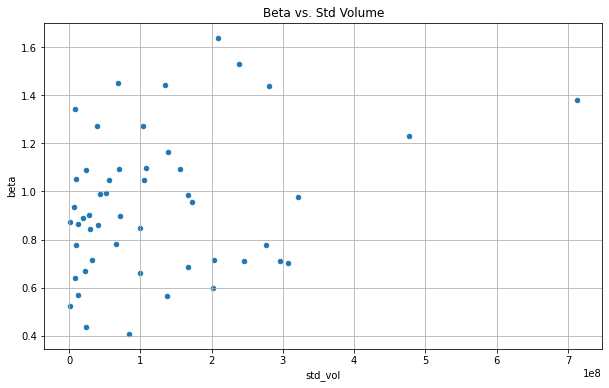

In [146]:
syms.plot(kind='scatter', x='std_vol', y='beta', grid=True, title='Beta vs. Std Volume', figsize=(10, 6))
plt.show()